Hotel Reservation EDA 

In [92]:
# Import Required Libraries 


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#For Data Viz. 
import matplotlib.pyplot as plt
import seaborn as sns 

#For Warnings
import warnings
warnings.filterwarnings('ignore')

#For Options 
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows', None)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [93]:
filepath = "Hotel Reservations.csv"

data_import = pd.read_csv(filepath)

data_import.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [94]:
data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [95]:
def duplicated_func(df) : 
    
    print(f"Total number of duplicated rows in data are: {df.duplicated().sum()}")


duplicated_func(data_import)

Total number of duplicated rows in data are: 0


In [96]:
# Check for missing values , if any ? 

def missing_vals(df): 
    for i in df :
        if df[i].isnull().sum() > 0 : 
            print(f"{i} : {df[i].isnull().sum()} missing values out of {len(df[i])}")
    else : 
        print("No missing columns.")

missing_vals(data_import)



No missing columns.


In [97]:
# Let's add Child and Adult to get a new feature called "Total no of guest"

data_import['total_guest'] =  data_import['no_of_adults'] + data_import['no_of_children']

Data Visualization 

In [98]:
data_viz_df = data_import.copy()

In [99]:
meal_plan_count = data_import.groupby('type_of_meal_plan')['type_of_meal_plan','Booking_ID'].size().reset_index().rename(columns = { 'type_of_meal_plan' : 'meal_plan', 0 : "Total_Count"})

In [100]:
meal_plan_count

,meal_plan,Total_Count
0,Meal Plan 1,27835
1,Meal Plan 2,3305
2,Meal Plan 3,5
3,Not Selected,5130


<AxesSubplot:xlabel='Total_Count', ylabel='meal_plan'>

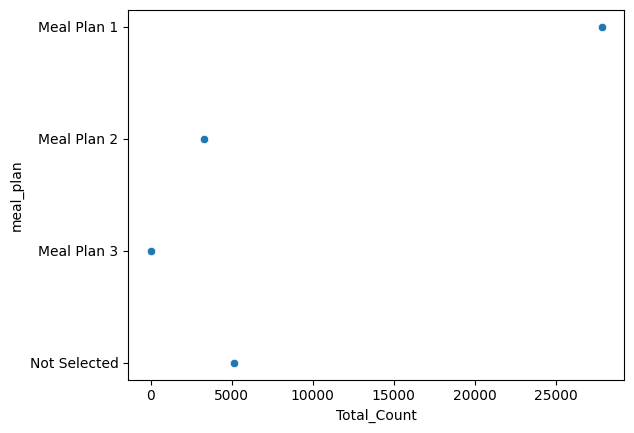

In [101]:
sns.scatterplot('Total_Count' , 'meal_plan' ,data = meal_plan_count)

Most guest opts for Meal plan 1 followed by meal plan 2. 

In [102]:
market_segment_type_count = data_import.groupby('market_segment_type')['market_segment_type','Booking_ID'].size().reset_index().rename(columns = {  0 : "Total_Count"})

In [103]:
market_segment_type_count

,market_segment_type,Total_Count
0,Aviation,125
1,Complementary,391
2,Corporate,2017
3,Offline,10528
4,Online,23214


<AxesSubplot:xlabel='market_segment_type', ylabel='Total_Count'>

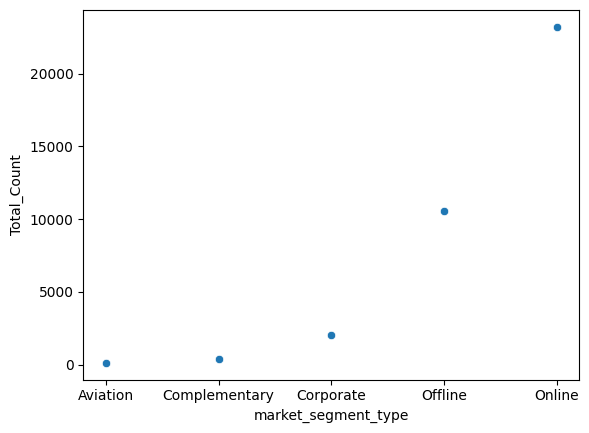

In [104]:
sns.scatterplot('market_segment_type' , 'Total_Count' ,data = market_segment_type_count)


Most of the booking of hotels are done through online followed by offline and corporate.

In [105]:
booking_status_count = data_import.groupby('booking_status')['booking_status','Booking_ID'].size().reset_index().rename(columns = {  0 : "Total_Count"})

booking_status_count

,booking_status,Total_Count
0,Canceled,11885
1,Not_Canceled,24390


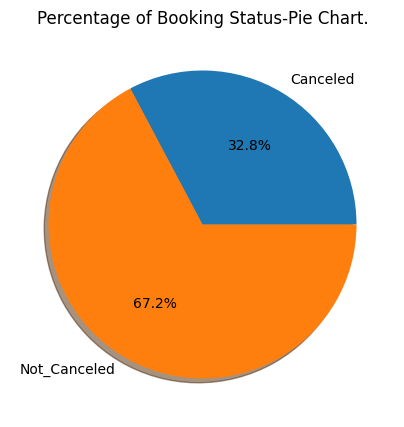

In [106]:
plt.pie(x = booking_status_count['Total_Count'], labels = booking_status_count['booking_status'] , autopct = '%1.1f%%' , shadow = True)
plt.title("Percentage of Booking Status-Pie Chart.")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

In [107]:
data_viz_df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'total_guest'],
      dtype='object')

In [108]:
adult_countadult_count = data_viz_df.groupby('no_of_adults')['no_of_adults','Booking_ID'].size().reset_index().rename(columns = {0 : 'Count'}).sort_values(by ='Count' ,ascending = False)


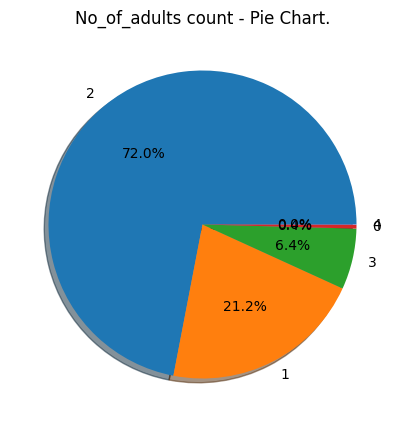

In [109]:
plt.pie(x = adult_count['Count'], labels = adult_count['no_of_adults'] , autopct = '%1.1f%%' , shadow = True)
plt.title("No_of_adults count - Pie Chart.")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

In [110]:
children_count = data_viz_df.groupby('no_of_children')['no_of_children','Booking_ID'].size().reset_index().rename(columns = {0 : 'Count'}).sort_values(by ='Count' ,ascending = False)
children_count

,no_of_children,Count
0,0,33577
1,1,1618
2,2,1058
3,3,19
4,9,2
5,10,1


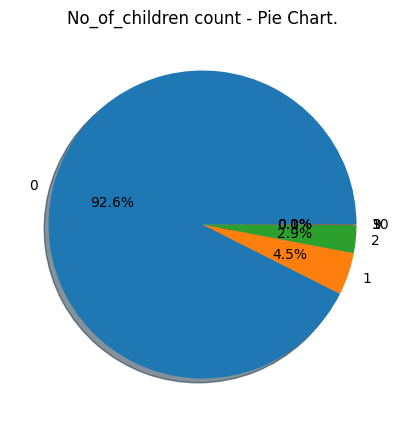

In [111]:
plt.pie(x = children_count['Count'], labels = children_count['no_of_children'] , autopct = '%1.1f%%' , shadow = True)
plt.title("No_of_children count - Pie Chart.")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

In [112]:
data_viz_df.groupby(['no_of_week_nights','no_of_weekend_nights'])['no_of_week_nights','Booking_ID','no_of_weekend_nights'].size().reset_index().rename(columns = {0 : 'Count'}).sort_values(by ='Count' ,ascending = False)

,no_of_week_nights,no_of_weekend_nights,Count
6,2,0,5745
3,1,0,5082
9,3,0,4180
7,2,1,3406
5,1,2,2466
8,2,2,2293
10,3,1,2071
4,1,1,1940
11,3,2,1588
12,4,0,1529
